In [1]:
import datasets

In [3]:
newsdataset = datasets.load_dataset('nlpHakdang/aihub-news30k',  data_files = "news_train_1_1.csv", use_auth_token='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')

Using custom data configuration nlpHakdang___aihub-news30k-355f9d6d6bac2347


  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /opt/ml/.cache/huggingface/datasets/csv/nlpHakdang___aihub-news30k-355f9d6d6bac2347/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dartdataset = datasets.load_dataset('nlpHakdang/beneficiary',  data_files = "dart_v3_1.csv", use_auth_token='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')

Using custom data configuration nlpHakdang___beneficiary-e856963eeb6fc9f4


  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /opt/ml/.cache/huggingface/datasets/csv/nlpHakdang___beneficiary-e856963eeb6fc9f4/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
corp_list = list(set(dartdataset['train']['기업 이름']))

In [10]:
len(corp_list)

2592

In [15]:
from tqdm import tqdm

In [14]:
newsdataset['train']['article'][0]

'ha당 조사료 400만원작물별 차등 지원이성훈 전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로 세부시행지침을 확정 시군에 통보했다지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a300평 이상 벼 이외 다른 작물을 재배한 농업인이다지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추 무 배추 인삼 대파 등 수급 불안 품목은 제외된다농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지 정부매입비축농지 농진청 시범사업 경관보전 직불금 수령 농지 등은 제외될 예정이다ha3000평당 지원 단가는 평균 340만원으로 사료작물 400만원 일반작물은 340만원 콩팥 등 두류작물은 280만원 등이다벼와 소득차와 영농 편이성을 감안해 작물별로 차등 지원된다논에 다른 작물 재배를 바라는 농가는 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에 신청해야 한다전남도는 도와 시군에 관련 기관과 농가 등이 참여하는논 타작물 지원사업 추진협의회를 구성 지역 특성에 맞는 작목 선정 및 사업 심의 등을 본격 추진할 방침이다최향철 전라남도 친환경농업과장은 최근 쌀값이 다소 상승추세에 있으나 매년 공급과잉에 따른 가격 하락으로 쌀농가에 어려움이 있었다며쌀 공급과잉을 구조적으로 해결하도록 논 타작물 재배 지원사업에 많이 참여해주길 바란다고 말했다'

In [18]:
news_dict.keys()

dict_keys(['솔트룩스', '휴마시스', 'KH 일렉트론', '제넨바이오', '에이블씨엔씨'])

In [21]:
news_dict = {}
for corp in tqdm(corp_list):
    news_dict[corp] = []
    for news in newsdataset['train']['article']:
        if corp in news :
            news_dict[corp].append(news)



100%|██████████| 2592/2592 [2:03:13<00:00,  2.85s/it]  


In [22]:
import pickle

In [23]:
with open('news_dict.pickle', 'wb') as f:
    pickle.dump(news_dict, f)

In [25]:
with open('news_dict.pickle', 'rb') as f:
    data = pickle.load(f)

In [29]:
error = 0
error_list = []
for key,val in data.items():
    if val == []:
        error+=1
        error_list.append(key)

In [50]:
error

441

In [33]:
val_list = []
for val in data.values():
    val_list.append(len(val))

In [37]:
import numpy as np

In [39]:
max(val_list), np.mean(val_list), np.median(val_list)

(65640, 132.92631172839506, 7.0)

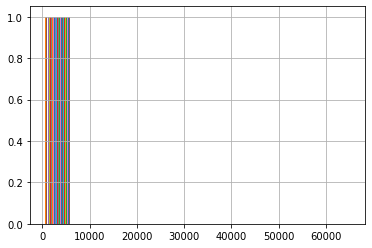

In [48]:
import matplotlib
import matplotlib.pyplot as plt

plt.hist(data)
plt.grid()
plt.show()

In [ ]:
_